# Reuse Traffic Sign Classifier dataset

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


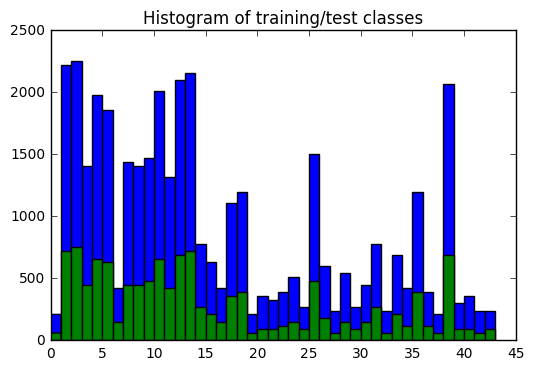

In [1]:
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/vitob/git_repositories/CarND-Traffic-Sign-Classifier-Project/train.p"
testing_file = "/home/vitob/git_repositories/CarND-Traffic-Sign-Classifier-Project/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
# <<JC>> Interesting... len shows the first element of np.shape()
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
get_ipython().magic('matplotlib inline')

plt.hist(y_train,range(n_classes+1))
plt.hist(y_test,range(n_classes+1))
plt.title("Histogram of training/test classes")
plt.show()



# StratifiedShuffleSplit

(39209, 32, 32, 3)
TRAIN: [ 8331 10389  3718 ..., 32414 26321 36678] TEST: [28869 19854 34632 ...,  9309 31041 25305]
[25 12 35 ...,  5 28 18]


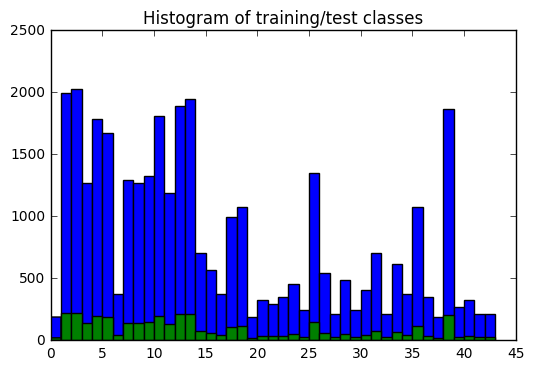

TRAIN: [ 3743 34030  8673 ..., 28809 21852 25021] TEST: [27865 34201 31429 ..., 17417 37582 17895]
[23 35 29 ..., 11 38 11]


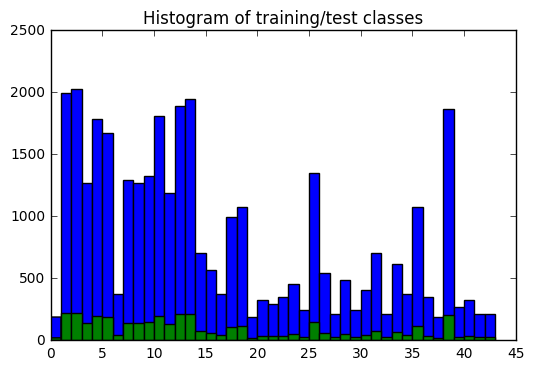

TRAIN: [38185  4261  5664 ..., 10621  6375  6744] TEST: [16661  3058  7291 ...,   106 10784 32499]
[10  2  4 ...,  0  7 31]


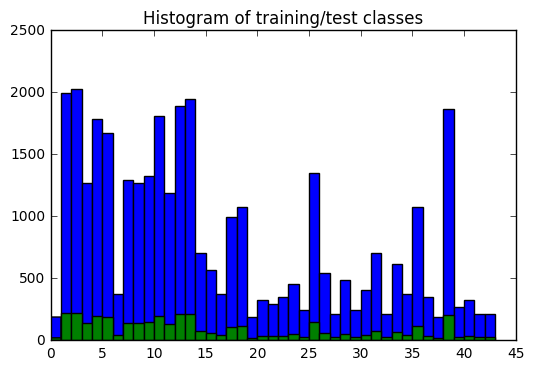

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([0, 0, 1, 1])
X = X_train
y = y_train
print(X.shape)
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.1, random_state=0)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_1, X_test_1 = X[train_index], X[test_index]
    y_train_1, y_test_1 = y[train_index], y[test_index]

    print(y_test_1)
    plt.hist(y_train_1,range(n_classes+1))
    plt.hist(y_test_1,range(n_classes+1))
    plt.title("Histogram of training/test classes")
    plt.show()

# Random over-sampling

X.shape =  (39209, 32, 32, 3)
y.shape =  (39209,)
uint8
X_o_sampled.shape =  (96750, 3072)
y_o_sampled.shape =  (96750,)
X_o_resampled.reshaped =  (96750, 32, 32, 3)
y_o_resampled.shape =  (96750,)


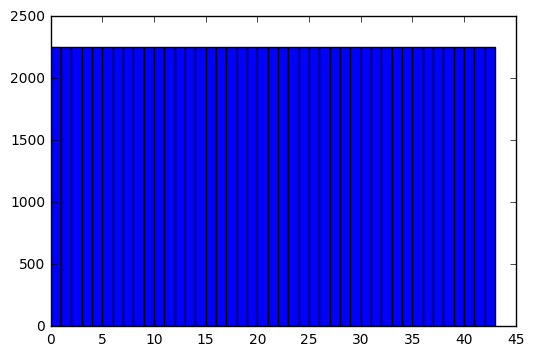

y_is_0 =  [2250 2251 2252 ..., 4497 4498 4499]
Saving oversampled data to pickle file...


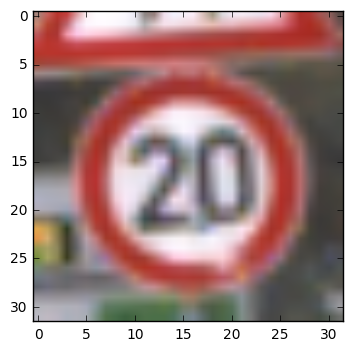

In [3]:
from imblearn.over_sampling import RandomOverSampler

d1,d2,d3,d4 = X_train.shape
print("X.shape = ", X_train.shape)
print("y.shape = ", y_train.shape)
print(y_train.dtype)
ros = RandomOverSampler()
X_o_resampled, y_o_resampled = ros.fit_sample(X_train.reshape([d1,-1]), y_train)

print("X_o_sampled.shape = ", X_o_resampled.shape)
print("y_o_sampled.shape = ", y_o_resampled.shape)
X_o_resampled = X_o_resampled.reshape([-1,d2,d3,d4])
print("X_o_resampled.reshaped = ", X_o_resampled.shape)
print("y_o_resampled.shape = ", y_o_resampled.shape)
plt.hist(y_o_resampled, range(n_classes+1))
plt.show()

y_is_0 = np.flatnonzero(y_o_resampled==0)
print("y_is_0 = ", y_is_0)
plt.imshow(X_o_resampled[y_is_0[2210]])

import os
pickle_file = 'train_oversampled.p'
if not os.path.isfile(pickle_file):
    print('Saving oversampled data to pickle file...')
    try:
        with open(pickle_file, 'wb') as f:
            pickle.dump(
                {
                    'features' : X_o_resampled,
                    'labels': y_o_resampled,
                },
                f, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ":", e)
        raise

# Combined: over-sampling and under-sampling

In [ ]:
from imblearn.combine import SMOTETomek

d1,d2,d3,d4 = X_train.shape
print("X.shape = ", X_train.shape)
print("y.shape = ", y_train.shape)
print(y_train.dtype)
sme = SMOTETomek()
# This takes forever!!!! Do not run.
#X_resampled, y_resampled = sme.fit_sample(X_train.reshape([d1,-1]), y_train)

print("X_resampled.shape = ", X_resampled.shape)
print("y_resampled.shape = ", y_resampled.shape)
X_resampled = X_resampled.reshape([-1,d2,d3,d4])
print("X_resampled.reshaped = ", X_resampled.shape)
print("y_resampled.shape = ", y_resampled.shape)
plt.hist(y_resampled, range(n_classes+1))
plt.show()

X.shape =  (39209, 32, 32, 3)
y.shape =  (39209,)
uint8


/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
